In [1]:
# root_mean_squared_error(y_train, y_pred_la)
### lasso model is wrong by 10.4 minutes on average

> From here on script is function based (following video at approx. 29:00)

In [25]:
#### capture all in a function
def read_dataframe(path_to_file):
    DF = pd.read_parquet(path_to_file)

    DF = DF[DF.trip_type == 1]
    
    DF['duration'] = DF.lpep_dropoff_datetime - DF.lpep_pickup_datetime
    DF.duration = DF.duration.apply(lambda td: td.total_seconds() / 60)

    DF = DF[(DF.duration >= 1) & (DF.duration < 60)]
    
    categorical = ['PULocationID', 'DOLocationID']
    DF[categorical] = DF[categorical].astype(str)
    DF['PUDO'] = DF['PULocationID'] + '_' + DF['DOLocationID']
    categorical = ['PUDO']

    DF[categorical] = DF[categorical].astype(str)
    numerical = ['trip_distance']
    return DF


In [26]:
df_train = read_dataframe('../notebooks/data/green_tripdata_2021-01.parquet')
df_test = read_dataframe('../notebooks/data/green_tripdata_2021-02.parquet')

In [27]:
len(dtr), len(dte), len(df_train), len(df_test)

(37535, 32728, 37535, 32728)

In [28]:
# df[categorical + numerical].iloc[:10].to_dict(orient='records')
train_dict = df_train[categorical + numerical].to_dict(orient='records')
test_dict  =  df_test[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dict)
X_test  = dv.transform(test_dict) #### AND NOT fit_transform

target = 'duration'
y_train = df_train[target].values
y_test  =  df_test[target].values

8.418751864502658

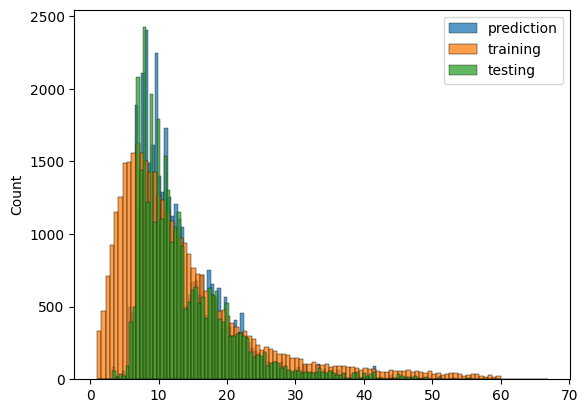

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_train)
y_pred_lr_test = lr.predict(X_test)

sns.histplot(y_pred_lr, label = 'prediction')
sns.histplot(y_train, label = 'training')
sns.histplot(y_pred_lr_test, label = 'testing')
plt.legend()
root_mean_squared_error(y_train, y_pred_lr)
root_mean_squared_error(y_test, y_pred_lr_test)

In [30]:
# la = Lasso()
# la.fit(X_train, y_train)

# y_pred_la = la.predict(X_train)
# y_pred_la_test = la.predict(X_test)
# sns.histplot(y_pred_la, label = 'prediction')
# sns.histplot(y_train, label = 'training')
# sns.histplot(y_pred_la_test, label = 'testing')
# plt.legend()
# root_mean_squared_error(y_train, y_pred_la)
# root_mean_squared_error(y_test, y_pred_la_test)

In [31]:
# la = Lasso(alpha = 0.01)
# la.fit(X_train, y_train)

# y_pred_la_test = la.predict(X_test)
# sns.histplot(y_pred_la, label = 'prediction')
# sns.histplot(y_train, label = 'training')
# sns.histplot(y_pred_la_test, label = 'testing')
# plt.legend()
# root_mean_squared_error(y_test, y_pred_la_test)

In [32]:
lr

LinearRegression()

In [33]:
dv

DictVectorizer()

In [36]:
!pwd

/workspaces/mlops-zc/01-intro


In [38]:
with open('../notebooks/models/lr.bin', 'wb') as f_out:
    pickle.dump((lr, dv), f_out)